In [3]:
import os 
import matplotlib.pyplot as plt
import pandas as pd 
import joblib
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

In [4]:
import random

In [5]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random weights [list]
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}\n")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{np.sum(self.error)}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
 
#Save model

    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filepath)
        

In [6]:
AND={
    'X1':[0,0,1,1],
    'X2':[0,1,0,1],
    'Y':[0,0,0,1]
}
AND=pd.DataFrame(AND)

In [7]:
AND

,X1,X2,Y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [8]:
def preparedata(df):
    x=df.drop(['Y'],axis=1)
    y=df['Y']
    return x,y

In [9]:
x,y=preparedata(AND)
ETA=0.1 
epochs=10

model_and=Perceptron(eta=ETA,epochs=epochs) #Object of perceptron

model_and.fit(x,y)
_=model_and.total_loss()


initial weights before training: 
[4.39462302e-05 9.02243980e-05 4.46804349e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 1 0 1]
error: 
-1
updated weights after epoch: 1/10: 
[ 4.39462302e-05 -9.99097756e-02  1.00044680e-01]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
1
updated weights after epoch: 2/10: 
[1.00043946e-01 9.02243980e-05 4.46804349e-05]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
-2
updated weights after epoch: 3/10: 
[ 4.39462302e-05 -9.99097756e-02  2.00044680e-01]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
1
updated weights after epoch: 4/10: 
[1.00043946e-01 9.02243980e-05 

In [10]:
OR={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'Y':[0,1,1,1]
}

OR=pd.DataFrame(OR)

In [11]:
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [12]:
X=OR.drop(['y'],axis=1)
y=OR['y']

In [13]:
ETA=0.1
EPOCH=10
model_or=Perceptron(eta=ETA,epochs=EPOCH)
model_or.fit(X,y)


initial weights before training: 
[6.56990141e-05 1.12592473e-05 8.88032592e-05]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.2000657   0.20001126 -0.2999112 ]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.2000657   0.20001126 -0.1999112 ]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.2000657   0.20001126 -0.0999112 ]
####################
--------------------
for epoch >> 3
--------------------
predicted value

In [14]:
XOR={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'Y':[0,1,1,0]
}
XOR=pd.DataFrame(XOR)


In [15]:
XOR

,x1,x2,Y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [16]:
x,y=preparedata(XOR)
ETA=0.1
epochs=10
model_xor=Perceptron(eta=ETA,epochs=epochs)
model_xor.fit(x,y)
_=model_xor.total_loss()

initial weights before training: 
[ 4.65206662e-06 -1.08157070e-04 -9.92287774e-06]

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 0 1 0]
error: 
0   -1
1    1
2    0
3    0
Name: Y, dtype: int64
updated weights after epoch: 1/10: 
[ 4.65206662e-06  9.98918429e-02 -9.92287774e-06]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: Y, dtype: int64
updated weights after epoch: 2/10: 
[-9.99953479e-02 -1.08157070e-04  1.99990077e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: Y, dtype: int64
updated weights after epoch: 3/10: 
[ 4.65206662e-06  9.98918429e-02 -9.92287774e-06]
####################
--------------------
for epoch >>

In [17]:
model_and.save(filename='and.model')

In [19]:
reload_and=Perceptron().load(filepath='Model/and.model')

In [21]:
X=AND.drop(['Y'],axis=1)

In [22]:
reload_and.predict(X)

array([0, 0, 0, 1])

In [2]:
import numpy as np
weights = np.random.randn(3) * 1e-4

In [3]:
weights

array([-7.12470077e-05,  1.69507370e-04, -3.30932913e-05])

In [ ]:
#Create Plots and save 

In [37]:
def save_plot(df,model,filename='plot.png',plot_dir='plots'):
    
    def _create_plot(df):
        df.plot(kind='scatter',x='x1',y='x2',c='Y',s=100,cmap='summer_r')
        plt.axhline(y=0,color='Black',linestyle='--',linewidth=1)
        plt.axvline(x=0,color='Black',linestyle='--',linewidth=1)
        figure=plt.gcf()
        figure.set_size_inches(10,8)
        
        
    def _Decision_plot(X,y,classifier,resolution=0.02):
        colors=('cyan','lightgreen')
        cmap=ListedColormap(colors)
        X=X.values
        x1=X[:,0]
        x2=X[:,1]
        x1_min,x1_max=x1.min()-1,x1.max()+1
        x2_min,x2_max=x2.min()-1,x2.max()+1
        xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution)
                           )
        y_hat=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat=y_hat.reshape(xx1.shape)
        plt.contourf(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        plt.plot()

        
    x,y=preparedata(df)
    
    
    _create_plot(df)
    _Decision_plot(x,y,model)
    
    os.makedirs(plot_dir,exist_ok=True)  #create Folder
    plot_path=os.path.join(plot_dir,filename) #join file name with folder name to create path
    plt.savefig(plot_path)
    
    

In [38]:
OR={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'Y':[0,1,1,1]
}

OR=pd.DataFrame(OR)

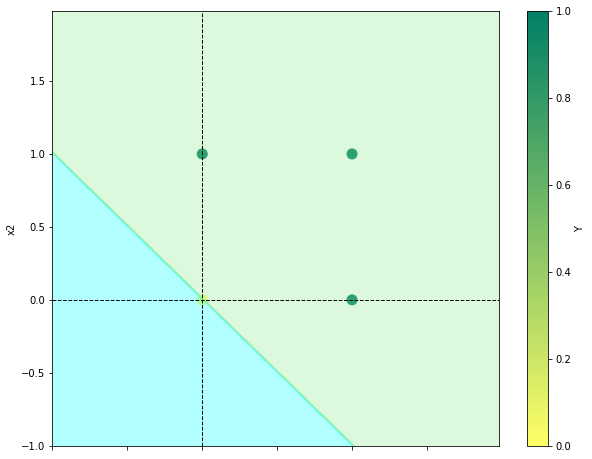

In [39]:
save_plot(OR,model=model_or,filename='or.png')

c:\users\shambhuraj patil\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


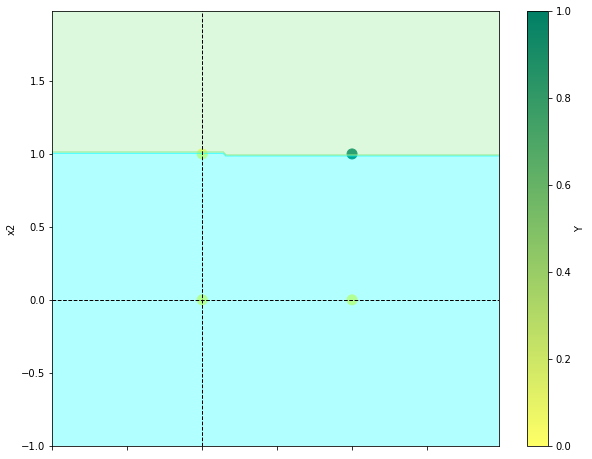

In [41]:
AND={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'Y':[0,0,0,1]
}
AND=pd.DataFrame(AND)
save_plot(AND,model=model_and,filename='and.png')

c:\users\shambhuraj patil\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


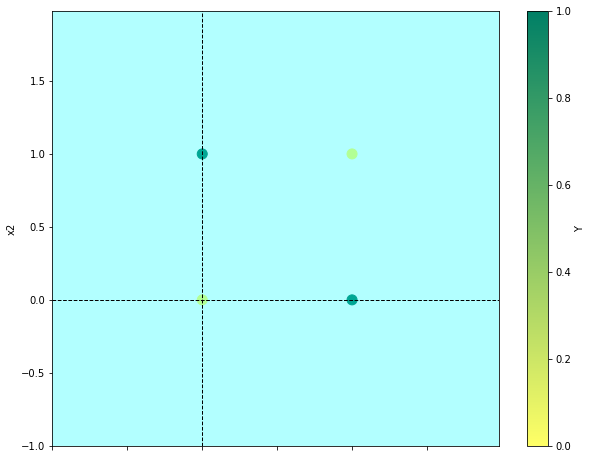

In [42]:
XOR={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'Y':[0,1,1,0]
}
XOR=pd.DataFrame(XOR)

save_plot(XOR,model=model_xor,filename='XOR.png') #perceptron fails 

In [43]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [44]:
X

,X1,X2
0,0,0
1,0,1
2,1,0
3,1,1
